In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import tensorflow as tf
sess = tf.Session()

x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [10]:
#Convert 1D to 2D
x_vals_column = x_vals[:,np.newaxis]

In [14]:
x_vals_column.ndim

2

In [13]:
x_vals.ndim

1

In [17]:
ones_column = np.repeat(1, 100)[:,np.newaxis]

In [25]:
A = np.hstack([x_vals_column, ones_column])

In [27]:
A.shape

(100, 2)

In [30]:
b = y_vals[:,np.newaxis]

In [31]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [32]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)

In [34]:
sess = tf.Session()

In [35]:
print(sess.run(tA_A))

[[ 3350.16835017   500.        ]
 [  500.           100.        ]]


In [36]:
tA_A_inv = tf.matrix_inverse(tA_A)

In [37]:
print(sess.run(tA_A_inv))

[[ 0.00117624 -0.00588119]
 [-0.00588119  0.03940594]]


In [38]:
product = tf.matmul(tA_A_inv,tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

In [39]:
solution_eval = sess.run(solution)

In [45]:
solution_eval

array([[ 1.03561411],
       [ 0.03014179]])

In [41]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 1.03561410644
y_intercept: 0.0301417892892


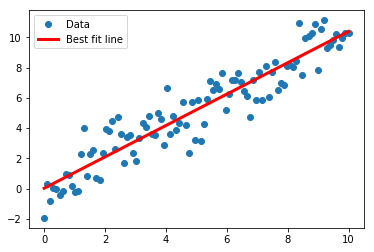

In [44]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [46]:
best_fit

[0.030141789289219983,
 0.13474927478829346,
 0.23935676028736691,
 0.34396424578644036,
 0.44857173128551386,
 0.55317921678458726,
 0.65778670228366076,
 0.76239418778273416,
 0.86700167328180766,
 0.97160915878088105,
 1.0762166442799546,
 1.1808241297790281,
 1.2854316152781016,
 1.3900391007771751,
 1.4946465862762484,
 1.5992540717753219,
 1.7038615572743954,
 1.8084690427734689,
 1.9130765282725422,
 2.0176840137716159,
 2.1222914992706894,
 2.2268989847697629,
 2.3315064702688364,
 2.4361139557679099,
 2.5407214412669834,
 2.6453289267660565,
 2.7499364122651304,
 2.8545438977642035,
 2.959151383263277,
 3.0637588687623505,
 3.168366354261424,
 3.2729738397604975,
 3.377581325259571,
 3.4821888107586445,
 3.586796296257718,
 3.6914037817567915,
 3.7960112672558646,
 3.9006187527549385,
 4.0052262382540116,
 4.1098337237530851,
 4.2144412092521586,
 4.3190486947512321,
 4.4236561802503056,
 4.5282636657493791,
 4.6328711512484526,
 4.7374786367475252,
 4.8420861222465996,
 4.946

### Linear Regression in the TensorFlow Way

In [47]:
from sklearn import datasets
from tensorflow.python.framework import ops

#Re-init new graph
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

In [51]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [53]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [56]:
learning_rate = 0.05
batch_size = 25

In [57]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [58]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [59]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [60]:
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [61]:
init = tf.global_variables_initializer()
sess.run(init)

In [62]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [63]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print('Loss = ''' + str(temp_loss))

Step #1 A = [[ 1.32532144]] b = [[-2.19702816]]
Loss = 43.2042
Step #2 A = [[ 2.21996093]] b = [[-1.57014275]]
Loss = 20.1767
Step #3 A = [[ 2.7416625]] b = [[-1.1085633]]
Loss = 14.637
Step #4 A = [[ 3.14331079]] b = [[-0.77118969]]
Loss = 8.54148
Step #5 A = [[ 3.38938665]] b = [[-0.48098269]]
Loss = 8.29293
Step #6 A = [[ 3.54085636]] b = [[-0.23431876]]
Loss = 8.05245
Step #7 A = [[ 3.62814474]] b = [[-0.05039357]]
Loss = 6.12767
Step #8 A = [[ 3.63563585]] b = [[ 0.05866937]]
Loss = 5.08892
Step #9 A = [[ 3.66413403]] b = [[ 0.25592712]]
Loss = 7.7726
Step #10 A = [[ 3.62150049]] b = [[ 0.33920306]]
Loss = 4.94016
Step #11 A = [[ 3.60434508]] b = [[ 0.47368592]]
Loss = 6.53916
Step #12 A = [[ 3.58317709]] b = [[ 0.59112287]]
Loss = 5.62065
Step #13 A = [[ 3.60867453]] b = [[ 0.73149401]]
Loss = 4.88675
Step #14 A = [[ 3.56334782]] b = [[ 0.80189508]]
Loss = 3.78618
Step #15 A = [[ 3.51755309]] b = [[ 0.89463866]]
Loss = 4.69005
Step #16 A = [[ 3.44465351]] b = [[ 0.96746844]]
Loss

In [64]:
[slope] = sess.run(A)

In [65]:
[y_intercept] = sess.run(b)

In [66]:
slope

array([ 1.32653689], dtype=float32)

In [67]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

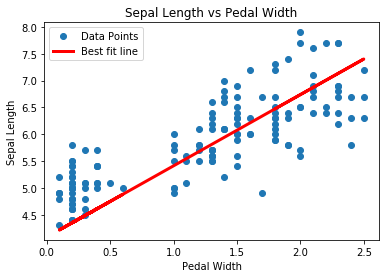

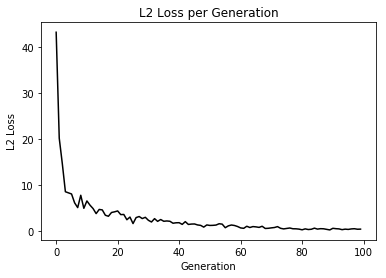

In [70]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

### Lasso & Ridge Regression

In [71]:
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
learning_rate = 0.001

In [72]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)